## Armenian Handwritten Letter Recognition

Myasnik Khachkalyan <br> Petros Mkheyan <br> Barsegh Atanyan

In [1]:
#importing the libraries
import os 
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, RNN

from tensorflow.keras.callbacks import TensorBoard 

In [2]:
path_main = '' ## put path to Mashtots images folder
path_lower = path_main + 'Lower'
path_upper = path_main + 'Upper'

In [3]:
folders_lower = ['ա', 'բ', 'գ', 'դ', 'ե', 'զ', 'է', 'ը', 'թ', 'ժ', 'ի', 'լ', 'խ', 'ծ', 'կ', 'հ', 'ձ', 'ղ', 'ճ', 'մ', 'յ', 'ն', 'շ', 'ո', 'չ', 'պ', 'ջ', 'ռ', 'ս', 'վ', 'տ', 'ր', 'ց', 'ու', 'փ', 'ք', 'և', 'օ', 'ֆ']

folders_upper = ['Ա', 'Բ', 'Գ', 'Դ', 'Ե', 'Զ', 'Է', 'Ը', 'Թ', 'Ժ', 'Ի', 'Լ', 'Խ', 'Ծ', 'Կ', 'Հ', 'Ձ', 'Ղ', 'Ճ', 'Մ', 'Յ', 'Ն', 'Շ', 'Ո', 'Չ', 'Պ', 'Ջ', 'Ռ', 'Ս', 'Վ', 'Տ', 'Ր', 'Ց', 'ՈՒ', 'Փ', 'Ք', 'ԵՎ', 'Օ', 'Ֆ']

dict_l = {'ա': 0, 'բ': 1, 'գ': 2, 'դ': 3, 'ե': 4, 'զ': 5, 'է': 6, 'ը': 7, 'թ': 8, 'ժ': 9, 'ի': 10, 'լ': 11, 'խ': 12, 'ծ': 13, 'կ': 14, 'հ': 15, 'ձ': 16, 'ղ': 17, 'ճ': 18, 'մ': 19, 'յ': 20, 'ն': 21, 'շ': 22, 'ո': 23, 'չ': 24, 'պ': 25, 'ջ': 26, 'ռ': 27, 'ս': 28, 'վ': 29, 'տ': 30, 'ր': 31, 'ց': 32, 'ու': 33, 'փ': 34, 'ք': 35, 'և': 36, 'օ': 37, 'ֆ': 38, 'Ա' : 39, 'Բ': 40, 'Գ': 41, 'Դ': 42, 'Ե': 43, 'Զ': 44, 'Է': 45, 'Ը': 46, 'Թ': 47, 'Ժ': 48, 'Ի': 49, 'Լ': 50, 'Խ': 51, 'Ծ': 52, 'Կ': 53, 'Հ': 54, 'Ձ': 55, 'Ղ': 56, 'Ճ': 57, 'Մ': 58, 'Յ': 59, 'Ն': 60, 'Շ': 61, 'Ո': 62, 'Չ': 63, 'Պ': 64, 'Ջ': 65, 'Ռ': 66, 'Ս': 67, 'Վ': 68, 'Տ': 69, 'Ր': 70, 'Ց': 71, 'ՈՒ': 72, 'Փ': 73, 'Ք': 74, 'ԵՎ': 75, 'Օ': 76, 'Ֆ': 77}

folders = folders_lower + folders_upper

### Convert data images to csv
##### No need to run this part if you have the data.csv and label.csv stored in the right directories

In [24]:
training_data = []
labels = []

for letter in folders_lower:
    p = os.path.join(path_lower, letter)

    for img in os.listdir(p):
        pic = cv2.imread(os.path.join(p, img), cv2.IMREAD_GRAYSCALE)
        training_data.append(pic)
        labels.append(dict_l[letter])

for letter in folders_upper:
    p = os.path.join(path_upper, letter)

    for img in os.listdir(p):
        pic = cv2.imread(os.path.join(p, img), cv2.IMREAD_GRAYSCALE)
        training_data.append(pic)
        labels.append(dict_l[letter])

In [25]:
X = np.array(training_data)
y = np.array(labels)

In [26]:
flattened = X.reshape(X.shape[0], X.shape[1]*X.shape[2])

In [27]:
dataframe = pd.DataFrame(flattened)

In [28]:
dataframe_labels = pd.DataFrame(y)
dataframe_labels.to_csv(os.path.join(path_main, 'labels.csv'), index = False)

In [29]:
dataframe.to_csv(os.path.join(path_main, 'data.csv'), index = False)

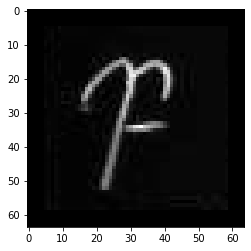

In [30]:
plt.imshow(flattened[9000].reshape(64, 64), cmap='gray')

## Read csv data

In [104]:
df = pd.read_csv(os.path.join(path_main, 'data.csv'))
labels = pd.read_csv(os.path.join(path_main, 'labels.csv'))

In [105]:
X_flattened = df.to_numpy()
y = labels.to_numpy()

In [106]:
X = X_flattened.reshape(X_flattened.shape[0], 64, 64)
y = y.reshape(y.shape[0])

In [107]:
_, counts = np.unique([folders[i] for i in y], return_counts=True)
np.mean(counts)

218.9102564102564

<BarContainer object of 78 artists>

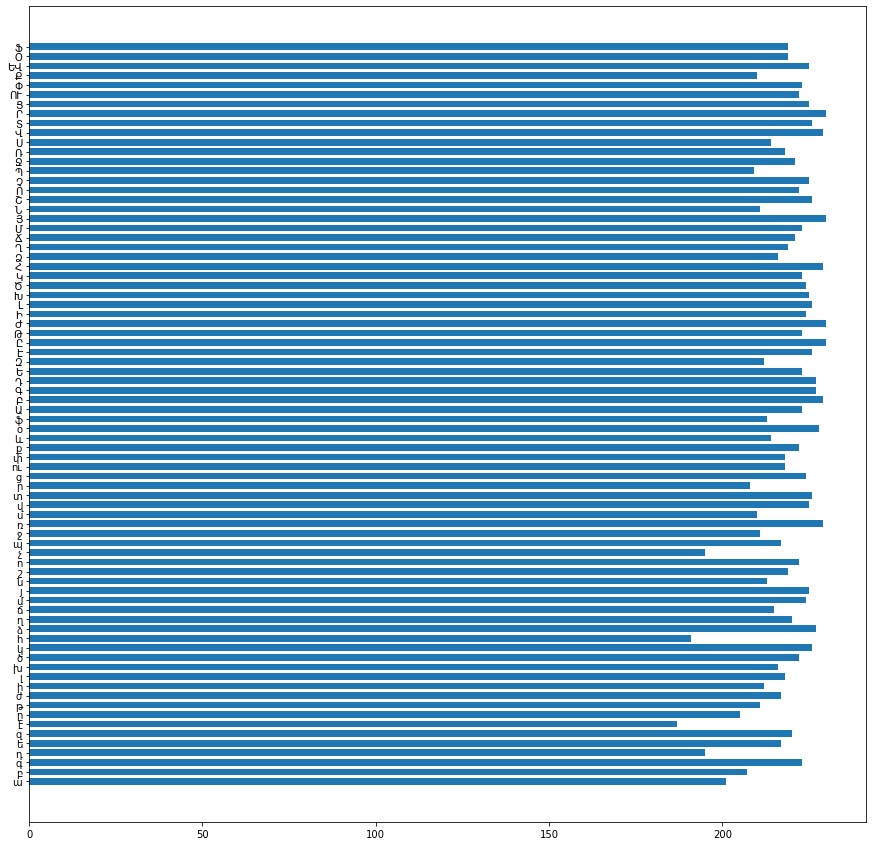

In [8]:
plt.figure(figsize = (15, 15))
plt.barh(folders, counts, height = 0.7)

## Creating the model

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [110]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [111]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)

input_shape = (64, 64, 1)

# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
X_val /= 255

In [44]:
table = []
table.append(["Train Data", X_train.shape[0], "60%"])
table.append(["Validation Data", X_val.shape[0], "20%"])
table.append(["Test Data", X_test.shape[0], "20%"])


table = np.array(table)


table_pd = pd.DataFrame({'Dataset': table[:, 0],
                        'N of images': table[:, 1],
                         '% of images': table[:, 2]})

table_pd

,Dataset,N of images,% of images
0,Train Data,10245,60%
1,Validation Data,3415,20%
2,Test Data,3415,20%


In [13]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(78,activation=tf.nn.softmax))

In [14]:
opt = tf.keras.optimizers.RMSprop()
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
history = model.fit(x = X_train, y = y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
321/321 [==============================] - 107s 332ms/step - loss: 4.2666 - sparse_categorical_accuracy: 0.0592 - val_loss: 2.6900 - val_sparse_categorical_accuracy: 0.3001
Epoch 2/10
321/321 [==============================] - 106s 330ms/step - loss: 1.5239 - sparse_categorical_accuracy: 0.5572 - val_loss: 1.4996 - val_sparse_categorical_accuracy: 0.5561
Epoch 3/10
321/321 [==============================] - 106s 331ms/step - loss: 0.7395 - sparse_categorical_accuracy: 0.7723 - val_loss: 1.0731 - val_sparse_categorical_accuracy: 0.6943
Epoch 4/10
321/321 [==============================] - 114s 357ms/step - loss: 0.4789 - sparse_categorical_accuracy: 0.8503 - val_loss: 0.5797 - val_sparse_categorical_accuracy: 0.8316
Epoch 5/10
321/321 [==============================] - 115s 360ms/step - loss: 0.3591 - sparse_categorical_accuracy: 0.8862 - val_loss: 0.6336 - val_sparse_categorical_accuracy: 0.8114
Epoch 6/10
321/321 [==============================] - 107s 334ms/step - loss: 0.

In [15]:
model.save('/89+/model11.h5') # path to save the new mode

In [17]:
tensorboard = TensorBoard(log_dir="./graph", update_freq = 1)


In [100]:
model_path = "/89+/model11.h5" #. path to read the latest model

new_model = tf.keras.models.load_model(model_path)

opt = tf.keras.optimizers.RMSprop(lr=0.0001)
new_model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
new_history = new_model.fit(x = X_train, y = y_train, epochs = 4, validation_data = (X_val, y_val), callbacks = [tensorboard])

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
new_model.evaluate(X_test, y_test)

In [100]:
new_model.save('model222.h5')

### By far best models 89+/model11.h5 and 89+/model222.h5

#### model222.h5 is trained 4 more epochs over model11.h5

In [99]:
model_path = "/Users/barseghatanyan/Desktop/mpr/89+/model222.h5" #. path to read the best model

best_model = tf.keras.models.load_model(model_path)


In [112]:
best_model.evaluate(X_test, y_test)

107/107 [==============================] - 6s 55ms/step - loss: 0.7199 - sparse_categorical_accuracy: 0.9001


[0.7199426293373108, 0.9001464247703552]

In [113]:
best_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 256)      

### Some visualizations

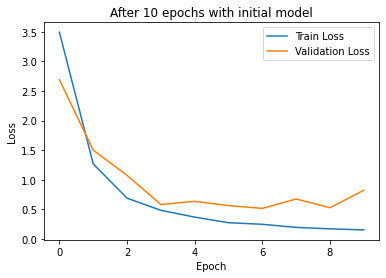

In [56]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title('After 10 epochs with initial model')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

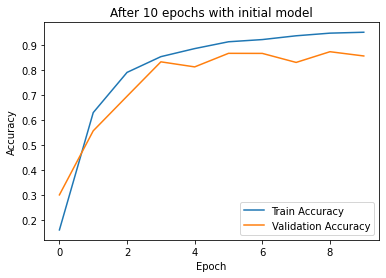

In [58]:
plt.plot(history.history['sparse_categorical_accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'Validation Accuracy')
plt.title('After 10 epochs with initial model')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

After 4 more epochs with changed learning rate


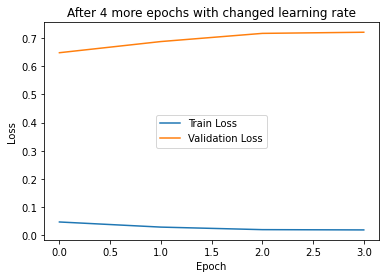

In [60]:
plt.plot(new_history.history['loss'], label = 'Train Loss')
plt.plot(new_history.history['val_loss'], label = 'Validation Loss')
plt.title('After 4 more epochs with changed learning rate')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="center")


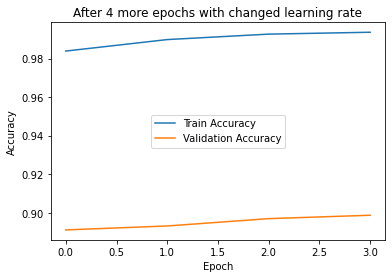

In [61]:
plt.plot(new_history.history['sparse_categorical_accuracy'], label = "Train Accuracy")
plt.plot(new_history.history['val_sparse_categorical_accuracy'], label = "Validation Accuracy")
plt.title('After 4 more epochs with changed learning rate')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="center")


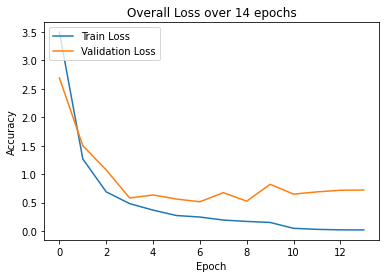

In [64]:
plt.plot(np.append(history.history['loss'], new_history.history['loss']), label = "Train Loss")
plt.plot(np.append(history.history['val_loss'], new_history.history['val_loss']), label = "Validation Loss")
plt.title('Overall Loss over 14 epochs')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

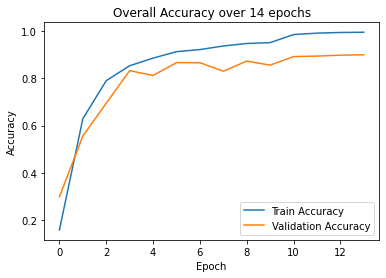

In [65]:
plt.plot(np.append(history.history['sparse_categorical_accuracy'], new_history.history['sparse_categorical_accuracy']), label = "Train Accuracy")
plt.plot(np.append(history.history['val_sparse_categorical_accuracy'], new_history.history['val_sparse_categorical_accuracy']), label = "Validation Accuracy")
plt.title('Overall Accuracy over 14 epochs')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

### Confusion Matrix

In [115]:
from tensorflow.math import confusion_matrix

y_predict = best_model.predict(X_test)

In [116]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [117]:
cm = confusion_matrix(labels = y_test, predictions = y_predict_labels)

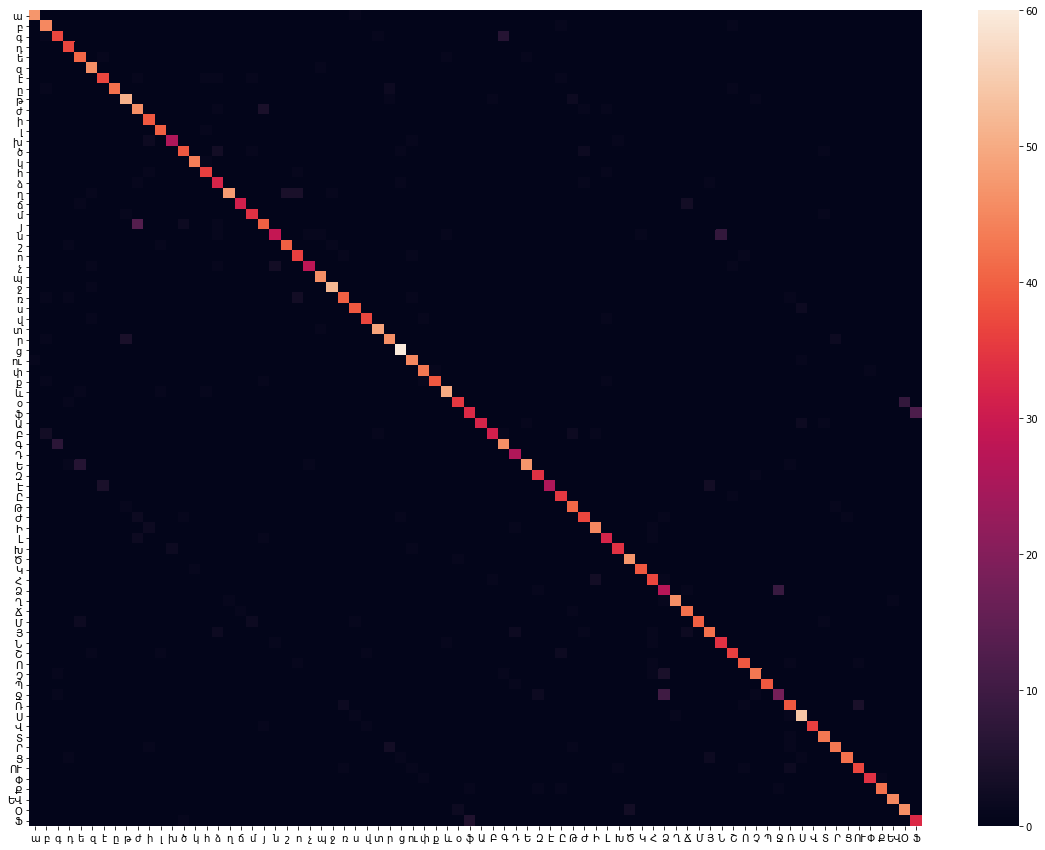

In [146]:
import seaborn as sb

plt.figure(figsize = (20, 15))
sb.heatmap(cm, fmt = 'd', xticklabels = folders, yticklabels = folders)

### Pairs of mispredicted letters ( 5 or more times )

In [118]:
table1 = []

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if(cm[i][j] >= 5 and i!=j):
            table1.append([folders[i], folders[j], cm[i, j].numpy()])
            
            
table1 = np.array(table1)


table1_pd = pd.DataFrame({'Actual Letter': table1[:, 0],
                        'Predicted Letter': table1[:, 1],
                         'N': table1[:, 2].astype('int')})




table1_pd.sort_values(by='N', ascending = False).style.hide_index()

Actual Letter,Predicted Letter,N
յ,ժ,13
ֆ,Ֆ,12
Ջ,Ձ,10
Ձ,Ջ,9
ն,Ն,8
օ,Օ,8
Գ,գ,7
գ,Գ,6
Ե,ե,6
Ֆ,ֆ,5


### 25 Random letters with corresponding predictions

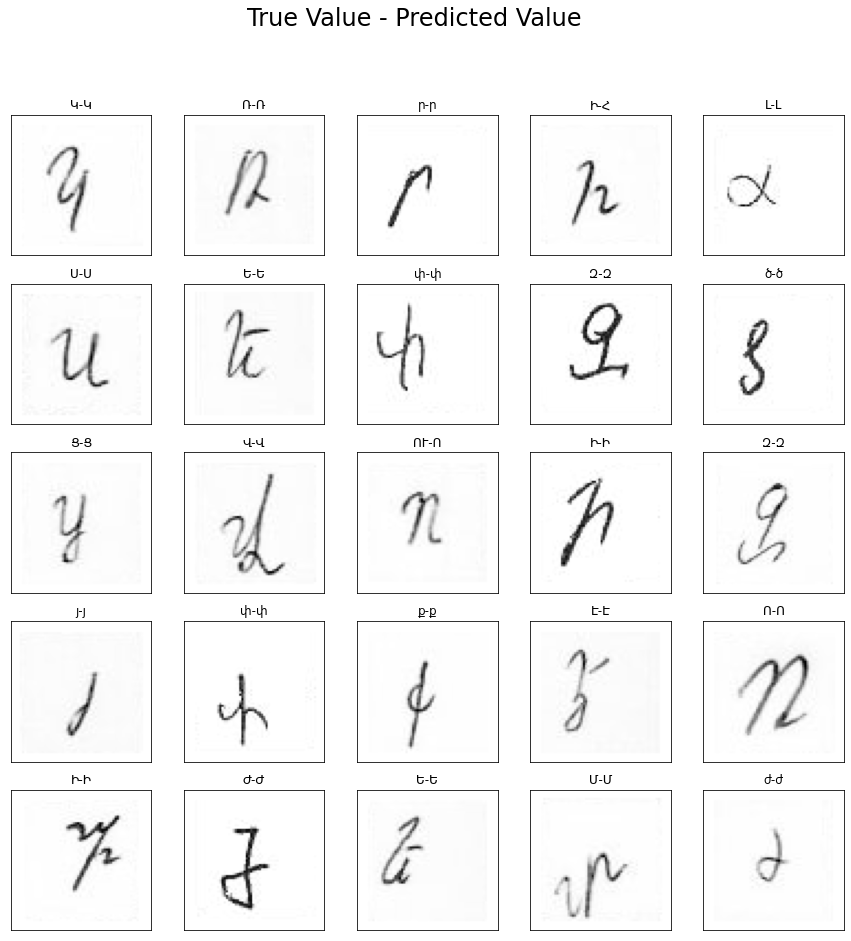

In [124]:
fig, axs = plt.subplots(5, 5, figsize=(15,15))
fig.suptitle("True Value - Predicted Value", fontsize = 24)
for i in range(5):
    for j in range(5):
        image_index = np.random.randint(0, X_test.shape[0])
        pred = best_model.predict(X_test[image_index].reshape(1, 64, 64, 1))
        axs[i, j].imshow(X_test[image_index].reshape(64, 64), cmap='Greys')
        axs[i, j].set_title(folders[y_test[image_index]] + '-' + folders[pred.argmax()])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([]) 

###  Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
X_flattened = df.to_numpy()

X_flattened = X_flattened / 255

X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size = 0.25, random_state = 0)


In [96]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

rf.score(X_test, y_test)

0.27172639962520495